In [1]:
#install.packages('Ecdat')

In [2]:
#Q1 https://autarkaw.org/2017/07/06/sum-of-the-residuals-for-the-linear-regression-model-is-zero/
#Q2 I could not find some answer to satify me. https://www.onlinemath4all.com/properties-of-regression-lines.html

In [3]:
library(Ecdat)


Loading required package: Ecfun

Attaching package: ‘Ecfun’

The following object is masked from ‘package:base’:

    sign


Attaching package: ‘Ecdat’

The following object is masked from ‘package:datasets’:

    Orange



In [4]:
data()

In [5]:
data(cars)

In [6]:
head(cars)
nrow(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


[1] 50

In [8]:
#3 4 https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/
#cor(speed, dist)

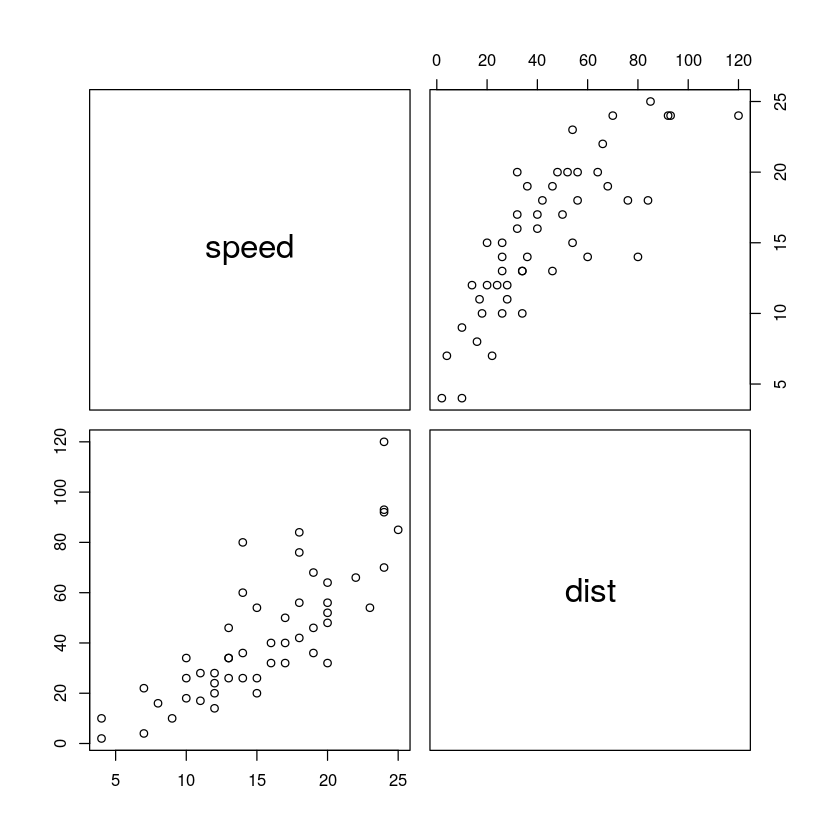

In [9]:
pairs(cars)

In [11]:
help (cars)

In [12]:
attach(cars)

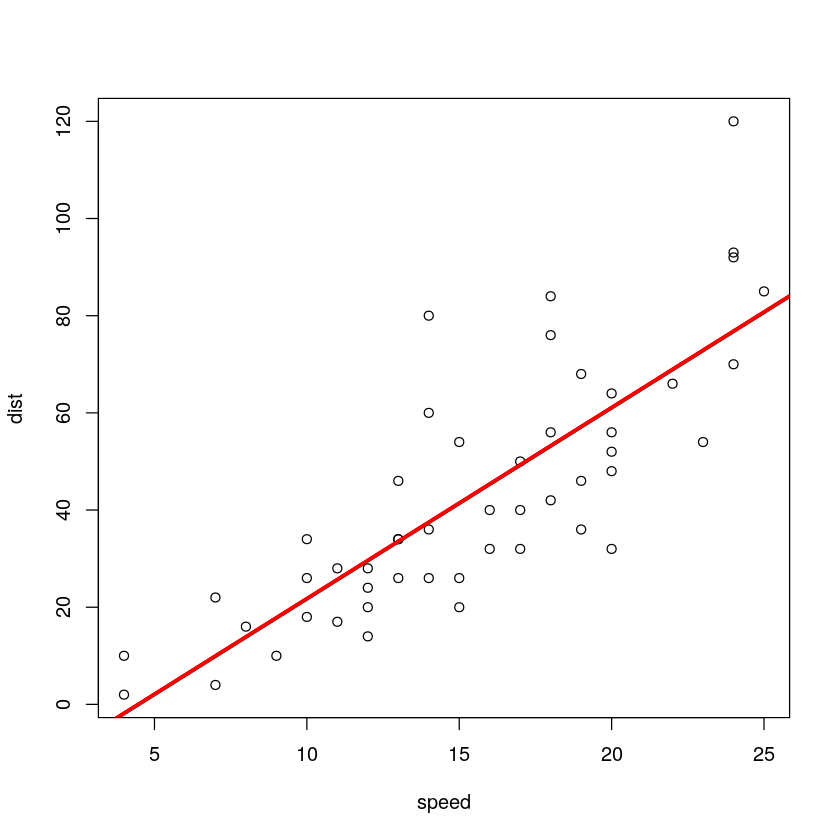

In [13]:
lm.fit = lm(dist~speed)
plot(speed, dist)
abline(lm.fit) #covered by the next command
abline(lm.fit,lwd=3)  #covered by the next command.
abline(lm.fit,lwd=3,col="red")

In [14]:
#Q5
summary(lm.fit)


Call:
lm(formula = dist ~ speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [15]:
help(cars)

In [16]:
library(dplyr)

temp <- cars %>%
    mutate(speed2=speed*0.44704) %>%
    mutate(dist2=dist*0.3048)

head(temp)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



speed,dist,speed2,dist2
4,2,1.78816,0.6096
4,10,1.78816,3.0480
7,4,3.12928,1.2192
7,22,3.12928,6.7056
8,16,3.57632,4.8768
9,10,4.02336,3.0480


In [17]:
#Q6 
lm.fit2 = lm(dist2~speed2, data=temp) # the data=temp is very important. otherwise, R gets confused in prediction.
summary(lm.fit2)


Call:
lm(formula = dist2 ~ speed2, data = temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8603 -2.9033 -0.6925  2.8086 13.1678 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.3581     2.0600  -2.601   0.0123 *  
speed2        2.6812     0.2833   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.688 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


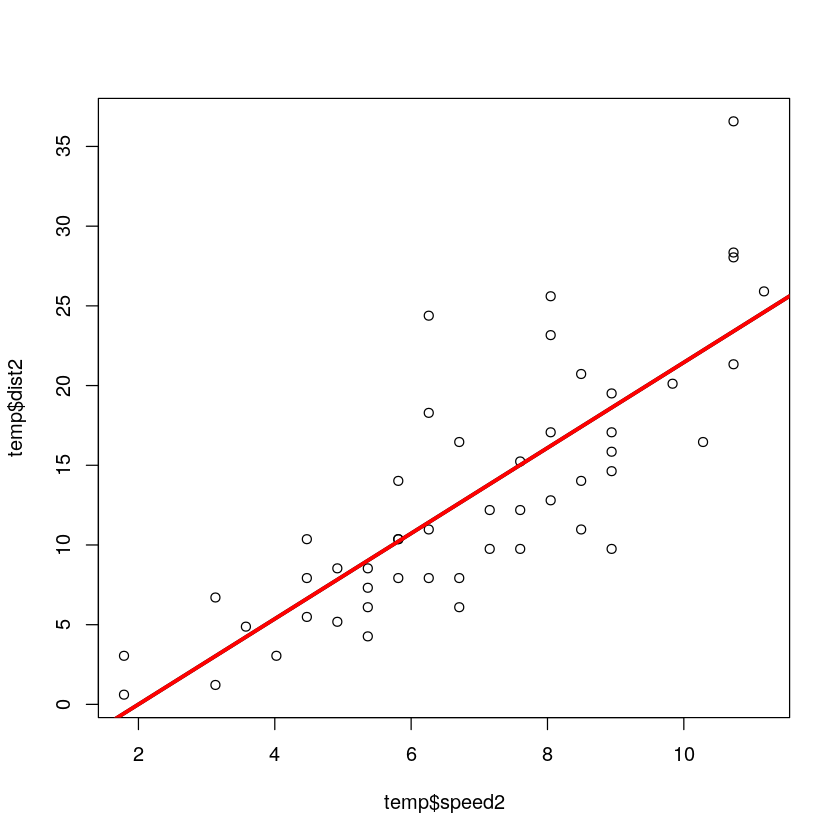

In [18]:

plot(temp$speed2, temp$dist2)
abline(lm.fit2) #covered by the next command
abline(lm.fit2,lwd=3)  #covered by the next command.
abline(lm.fit2,lwd=3,col="red")

In [19]:
#Q7  https://stats.stackexchange.com/questions/69144/calculating-prediction-interval
predict(lm.fit2, data.frame(speed2=c(7.5)), interval="confidence", level = 0.9) 
# interval should be 'predict'. Check the link above
# https://stackoverflow.com/questions/38109501/how-does-predict-lm-compute-confidence-interval-and-prediction-interval

fit,lwr,upr
14.7508,13.60107,15.90053


In [22]:
predict(lm.fit2, data.frame(speed2=c(7.5)), interval="predict")

fit,lwr,upr
14.7508,5.22531,24.27629


In [176]:
?predict.lm

In [130]:
lm.fit3=lm(dist2~speed2 - 1, data=temp) # x ~ y -1 means linear regression with dropping the intercept.
summary(lm.fit3)


Call:
lm(formula = dist2 ~ speed2 - 1, data = temp)

Residuals:
   Min     1Q Median     3Q    Max 
-7.981 -3.852 -1.663  1.399 15.295 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
speed2  1.98350    0.09639   20.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.956 on 49 degrees of freedom
Multiple R-squared:  0.8963,	Adjusted R-squared:  0.8942 
F-statistic: 423.5 on 1 and 49 DF,  p-value: < 2.2e-16


In [131]:
#Q8
#why without intercept the R^2 increases?
#https://rcompanion.org/handbook/G_09.html
#https://statisticsbyjim.com/regression/interaction-effects/

#The variable r2 is called the coefficient of determination and is the square of the correlation coefficient, but is usually stated as a percent, rather than in decimal form. It has an interpretation in the context of the data:
#    r2, when expressed as a percent, represents the percent of variation in the dependent (predicted) variable y that can be explained by variation in the independent (explanatory) variable x using the regression (best-fit) line.
#    1 – r2, when expressed as a percentage, represents the percent of variation in y that is NOT explained by variation in x using the regression line. This can be seen as the scattering of the observed data points about the regression line.

In [ ]:
# Q9 to Q14
# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients 

#the model that includes the
#interaction term is superior to the model that contains only main effects. main effect
#The p-value for the interaction term, TV×radio, is extremely low, indicating
#that there is strong evidence for Ha : β3 != 0. In oth

In [132]:
#Question 14 - 18
# https://datascienceplus.com/how-to-detect-heteroscedasticity-and-rectify-it/

In [133]:
library(MASS)
dat <- Boston
head(dat)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [134]:
#help(Boston)
lm.fit4 = lm(medv~. - age - indus, data=dat)


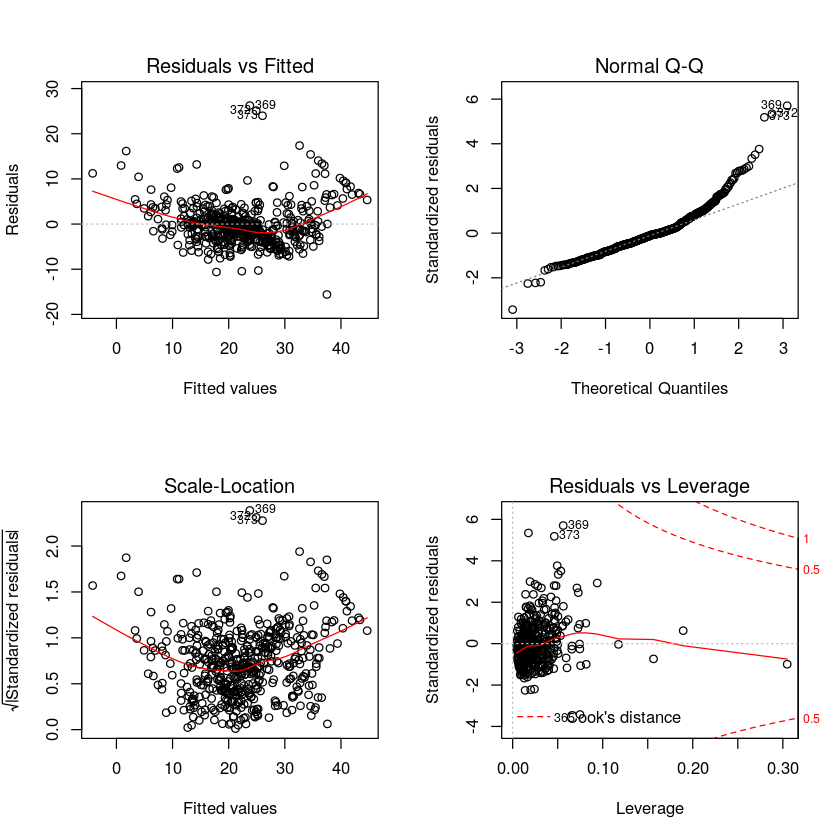

In [135]:
par(mfrow=c(2,2))
plot(lm.fit4)

In [136]:
# https://www.r-bloggers.com/shapiro-wilk-test-for-normality-in-r/
shapiro.test(residuals(lm.fit3))


	Shapiro-Wilk normality test

data:  residuals(lm.fit3)
W = 0.90808, p-value = 0.0008983


In [137]:
install.packages('lmtest')
library(lmtest)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [138]:
# http://www.learnbymarketing.com/tutorials/linear-regression-in-r/
dwtest(lm.fit3)


	Durbin-Watson test

data:  lm.fit3
DW = 1.4086, p-value = 0.01574
alternative hypothesis: true autocorrelation is greater than 0


In [139]:
#18
lm.fit5 = lm(sqrt(medv)~. - age - indus, data=dat)

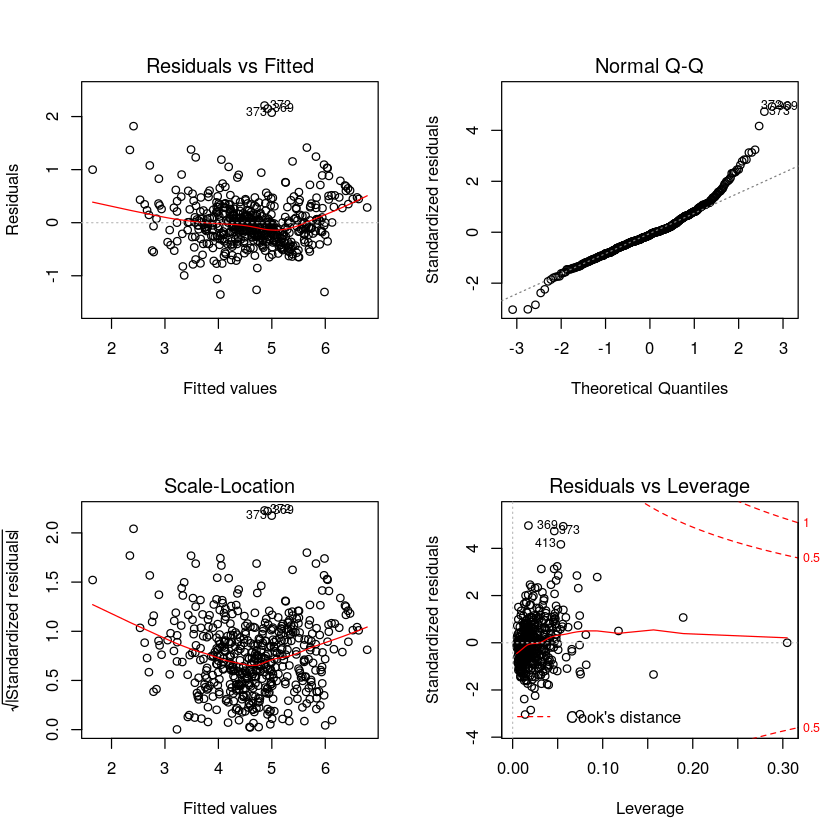

In [140]:
par(mfrow=c(2,2))
plot(lm.fit5)

In [148]:
#19 21
EDSAL = read.csv("./EDSAL.csv", header = TRUE)

In [149]:
head(EDSAL)

Education,Experience,Salary
HS,2,34.43222
HS,14,59.15737
HS,36,113.27017
HS,16,69.14739
HS,36,106.01556
HS,33,58.63413



Call:
lm(formula = Salary ~ Experience, data = EDSAL)

Residuals:
   Min     1Q Median     3Q    Max 
-73.00 -12.82  -1.18  13.32  60.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.4679     2.5673   11.48   <2e-16 ***
Experience    3.0959     0.1113   27.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.05 on 298 degrees of freedom
Multiple R-squared:  0.7218,	Adjusted R-squared:  0.7209 
F-statistic: 773.2 on 1 and 298 DF,  p-value: < 2.2e-16


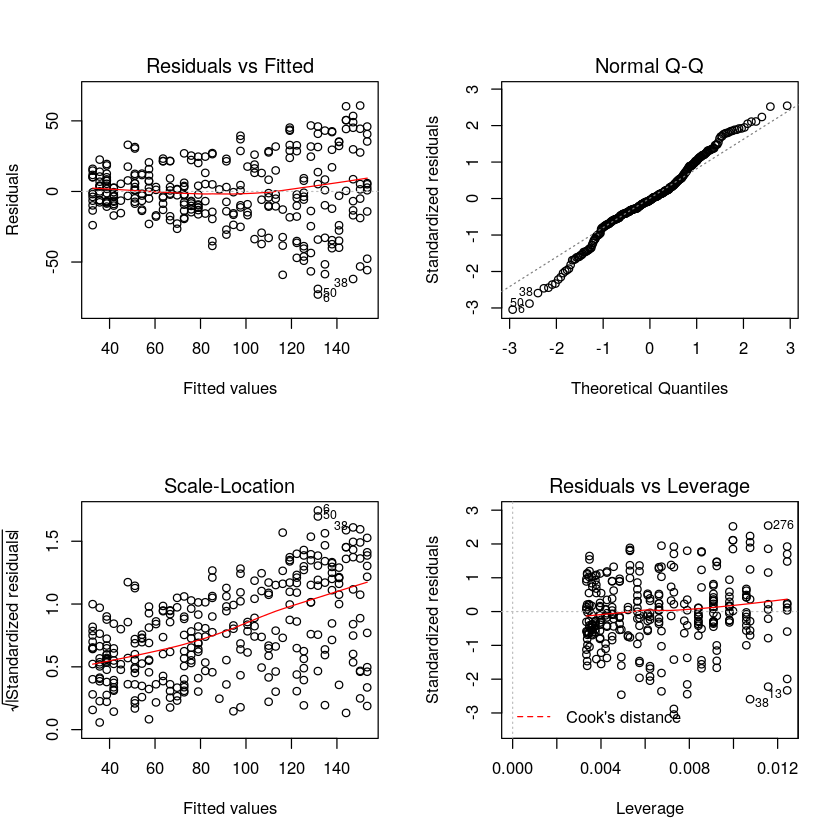

In [156]:
lm.fit01 = lm(Salary~Experience, data=EDSAL)
par(mfrow=c(2,2))
plot(lm.fit01)
summary(lm.fit01)


Call:
lm(formula = Salary ~ log(Experience), data = EDSAL)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.700 -21.895  -5.022  16.730  84.879 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.991      4.768  -0.418    0.677    
log(Experience)   34.985      1.704  20.529   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.35 on 298 degrees of freedom
Multiple R-squared:  0.5858,	Adjusted R-squared:  0.5844 
F-statistic: 421.5 on 1 and 298 DF,  p-value: < 2.2e-16


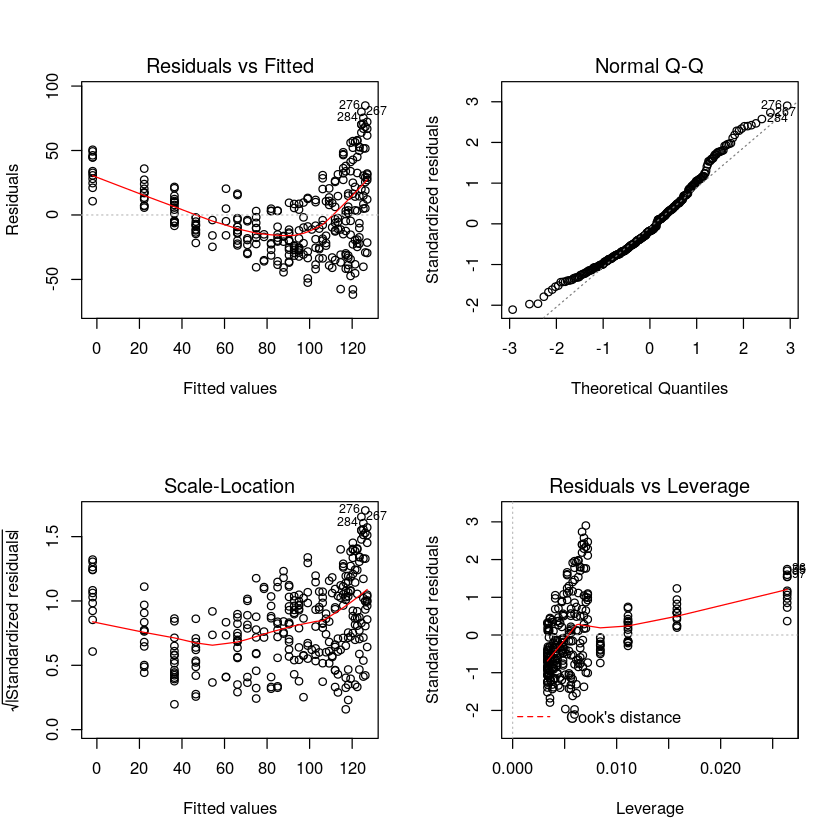

In [157]:
lm.fit01 = lm(Salary~log(Experience), data=EDSAL)
par(mfrow=c(2,2))
plot(lm.fit01)
summary(lm.fit01)


Call:
lm(formula = log(Salary) ~ Experience, data = EDSAL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51651 -0.17318  0.02534  0.19444  0.53280 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.640177   0.029106  125.07   <2e-16 ***
Experience  0.037087   0.001262   29.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2727 on 298 degrees of freedom
Multiple R-squared:  0.7434,	Adjusted R-squared:  0.7425 
F-statistic: 863.2 on 1 and 298 DF,  p-value: < 2.2e-16


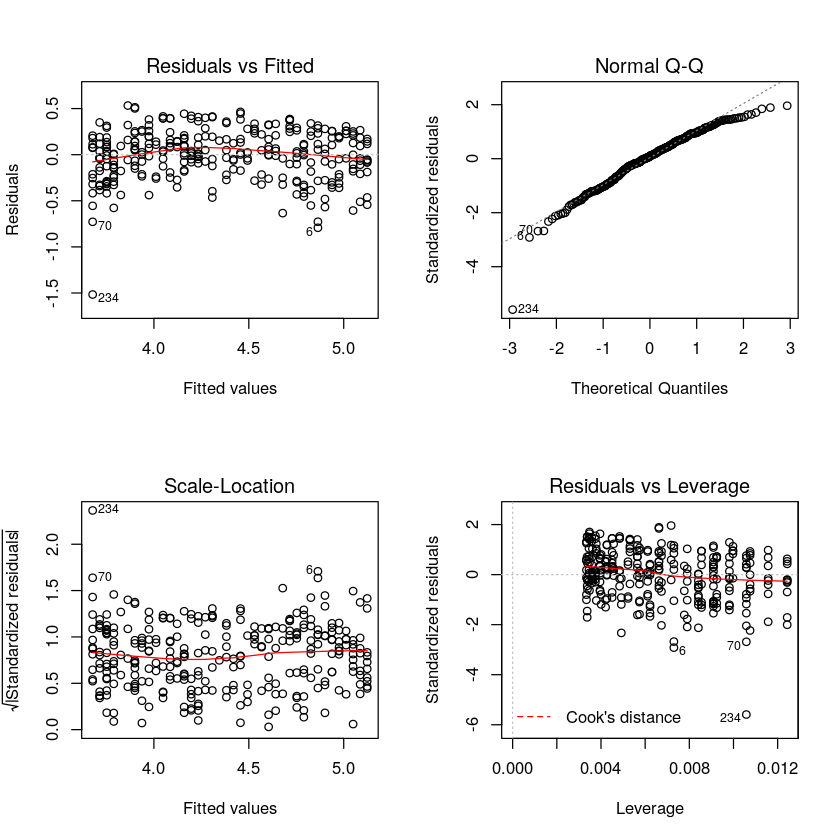

In [158]:
lm.fit01 = lm(log(Salary)~Experience, data=EDSAL)
par(mfrow=c(2,2))
plot(lm.fit01)
summary(lm.fit01)


Call:
lm(formula = log(Salary) ~ log(Experience), data = EDSAL)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99692 -0.19914 -0.00272  0.20315  0.72587 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.15767    0.04584   68.88   <2e-16 ***
log(Experience)  0.45949    0.01638   28.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2822 on 298 degrees of freedom
Multiple R-squared:  0.7252,	Adjusted R-squared:  0.7243 
F-statistic: 786.5 on 1 and 298 DF,  p-value: < 2.2e-16


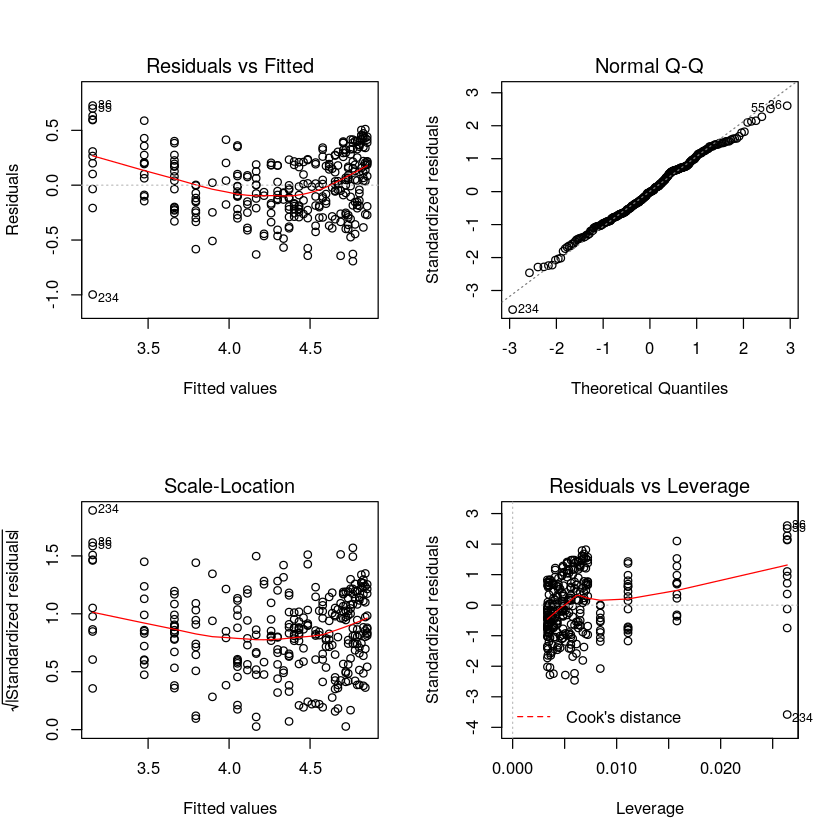

In [159]:
lm.fit01 = lm(log(Salary)~log(Experience), data=EDSAL)
par(mfrow=c(2,2))
plot(lm.fit01)
summary(lm.fit01)